<a href="https://colab.research.google.com/github/aa3429/project-team-two-milestone-four/blob/segmentation/Milestone_4_Segmentation_Team_Two.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating an Environment

In [ ]:
# Importing the libraries
 
import numpy as np
import tensorflow as tf
from tensorflow import keras
import cv2
from scipy import io
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [ ]:
!git clone https://github.com/aa3429/project-team-two-milestone-four.git


fatal: destination path 'project-team-two-milestone-four' already exists and is not an empty directory.


In [ ]:
# Checking the cloned repository we will be working with


!ls project-team-two-milestone-four/

 annotation.md	 data-acquisition.md  'Login Screen Images'
 annotations	 images		       README.md


In [ ]:
# Here we'll first upload all the images to our local cloud storage or google drive in roder to make this code run

import matplotlib.pyplot as plt
import os
import cv2
items = os.listdir('/content')
print (items)    



['.config', '6367816810.txt', '0669967653.jpg', '1075236797.jpg', '2435136993.txt', '8567632275.txt', '8849549619.txt', '5681901238.txt', '5845286352.jpg', '2611464300.txt', '6003917404.txt', '7055139518.txt', '5845286352.txt', '8442395581.txt', '5399607777.jpg', '2090697536.txt', '7419276515.jpg', '2786879340.txt', '7454224618.jpg', '8574081471.txt', '5342570180.txt', '8795069283.jpg', '6855621658.jpg', '8891828437.txt', '9933902809.txt', '2142384610.jpg', '7900167624.txt', '5667166319.txt', '6471209237.txt', '4618590141.txt', '1119086339.txt', '9023946518.txt', '4829355963.txt', '6762666938.jpg', '9895224330.jpg', '6239778721.txt', '6222621067.jpg', '7852028227.txt', '9157205932.jpg', '1376745366.jpg', '0334899695.jpg', '9882268503.jpg', '5681901238.jpg', '2019564138.txt', '6314455617.jpg', '7119803412.jpg', '8501697530.jpg', '4992541397.txt', '9200330328.jpg', '8675322701.jpg', '9004940100.txt', '8934489961.txt', '8512359132.txt', '7860535176.jpg', '3254764688.txt', '2310594344.txt'

In [ ]:

images=[]
for each_image in items:
  if each_image.endswith(".jpg"):
    print (each_image)
    full_path = "/content/" + each_image
    print (full_path)
    image = cv2.imread(full_path)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    images.append(tf.convert_to_tensor(image))


0669967653.jpg
/content/0669967653.jpg
1075236797.jpg
/content/1075236797.jpg
5845286352.jpg
/content/5845286352.jpg
5399607777.jpg
/content/5399607777.jpg
7419276515.jpg
/content/7419276515.jpg
7454224618.jpg
/content/7454224618.jpg
8795069283.jpg
/content/8795069283.jpg
6855621658.jpg
/content/6855621658.jpg
2142384610.jpg
/content/2142384610.jpg
6762666938.jpg
/content/6762666938.jpg
9895224330.jpg
/content/9895224330.jpg
6222621067.jpg
/content/6222621067.jpg
9157205932.jpg
/content/9157205932.jpg
1376745366.jpg
/content/1376745366.jpg
0334899695.jpg
/content/0334899695.jpg
9882268503.jpg
/content/9882268503.jpg
5681901238.jpg
/content/5681901238.jpg
6314455617.jpg
/content/6314455617.jpg
7119803412.jpg
/content/7119803412.jpg
8501697530.jpg
/content/8501697530.jpg
9200330328.jpg
/content/9200330328.jpg
8675322701.jpg
/content/8675322701.jpg
7860535176.jpg
/content/7860535176.jpg
4267384345.jpg
/content/4267384345.jpg
2146252432.jpg
/content/2146252432.jpg
6896688489.jpg
/content/6

In [ ]:
len(images)

325

In [ ]:
## Bringing the annotations by clonning the git repository.
# Here we'll bring all annotated files of annotations to our google cloud before running the following code.

items = os.listdir('/content')
print (items) 



 

['.config', '6367816810.txt', '0669967653.jpg', '1075236797.jpg', '2435136993.txt', '8567632275.txt', '8849549619.txt', '5681901238.txt', '5845286352.jpg', '2611464300.txt', '6003917404.txt', '7055139518.txt', '5845286352.txt', '8442395581.txt', '5399607777.jpg', '2090697536.txt', '7419276515.jpg', '2786879340.txt', '7454224618.jpg', '8574081471.txt', '5342570180.txt', '8795069283.jpg', '6855621658.jpg', '8891828437.txt', '9933902809.txt', '2142384610.jpg', '7900167624.txt', '5667166319.txt', '6471209237.txt', '4618590141.txt', '1119086339.txt', '9023946518.txt', '4829355963.txt', '6762666938.jpg', '9895224330.jpg', '6239778721.txt', '6222621067.jpg', '7852028227.txt', '9157205932.jpg', '1376745366.jpg', '0334899695.jpg', '9882268503.jpg', '5681901238.jpg', '2019564138.txt', '6314455617.jpg', '7119803412.jpg', '8501697530.jpg', '4992541397.txt', '9200330328.jpg', '8675322701.jpg', '9004940100.txt', '8934489961.txt', '8512359132.txt', '7860535176.jpg', '3254764688.txt', '2310594344.txt'

In [ ]:
# Getting Annotations out

annotations=[]
for each_annot in items:
  if each_annot.endswith(".txt"):
    print (each_annot)
    full_path = "/content/" + each_annot
    with open(full_path) as f:
      annots = f.read()
      print(annots)
      annotations.append(annots)

      

6367816810.txt
7 0.499817 0.509950 0.992900 0.368767

2435136993.txt
8 0.483950 0.503900 0.797367 0.611733

8567632275.txt
9 0.501767 0.501417 0.529133 0.928833

8849549619.txt
8 0.519417 0.482100 0.842167 0.556867

5681901238.txt
7 0.495000 0.505667 0.976667 0.346000

2611464300.txt
0 0.498867 0.564167 0.994933 0.592333

6003917404.txt
6 0.567833 0.505367 0.466333 0.965933

7055139518.txt
2 0.504867 0.498950 0.512267 0.976567

5845286352.txt
5 0.521217 0.502950 0.942233 0.962567

8442395581.txt
9 0.506667 0.528300 0.371333 0.810600
1 0.920400 0.345950 0.097933 0.195900
1 0.307450 0.209217 0.067567 0.192433

2090697536.txt
2 0.498533 0.503067 0.699067 0.891200

2786879340.txt
5 0.127267 0.299067 0.246267 0.254067

8574081471.txt
4 0.502683 0.502317 0.354633 0.932100

5342570180.txt
3 0.502367 0.499333 0.911933 0.608000

8891828437.txt
1 0.478667 0.526617 0.338000 0.759900

9933902809.txt
7 0.492483 0.500167 0.955700 0.481667

7900167624.txt
2 0.312133 0.434817 0.363600 0.532367

566716

In [ ]:
len(annotations)

325

In [ ]:
len(images), len(annotations)

(325, 325)

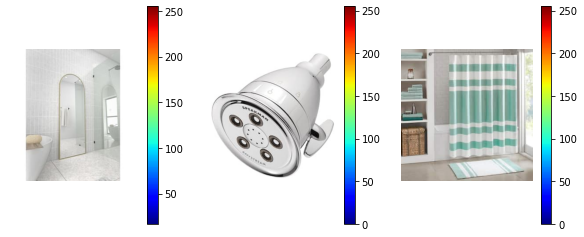

In [ ]:
# Visualizing some of the images

plt.figure(figsize=(10,4))
for i in range(1,4):
    plt.subplot(1,3,i)
    img = images[i]
    plt.imshow(img, cmap='jet')
    plt.colorbar()
    plt.axis('off')
plt.show() 

# Model Selection

We will choose Unet as our model and will import its pipelines from a pretraied model. UNet architecture has got many models like - MobileNetV2, ResNet, NASNet, Inception, DenseNet, or EfficientNet

 DenseNet is the pretrained model we are deciding to go with.





We prefer a pre-trained DenseNet121 to be the downstack that can be obtained through transfer learning and build the upstack with https://www.tensorflow.org/tutorials/generative/pix2pix, a publicly available generative upstack template (it saves our time and code).

# Build Downstack Model

In [ ]:
# Load DenseNet121 from in-built applications.


base = keras.applications.DenseNet121(input_shape=[128,128,3], 
                                       include_top=False, 
                                       weights='imagenet') 


In [ ]:
# Checking the layers

len(base.layers)

427

The DenseNet121 model has 427 layers. We need to identify suitable layers whose output will be used for skip connections. 

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.693966 to fit



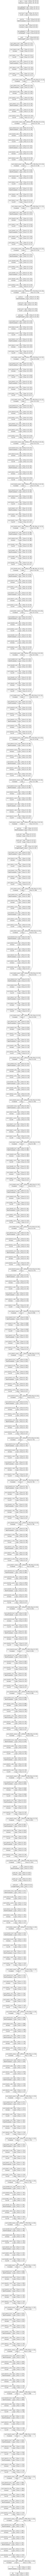

In [ ]:
#Lets plot the entire model, along with the feature shapes

keras.utils.plot_model(base, show_shapes=True)

We select the final ReLU activation layer for each feature map size, i.e. 4, 8, 16, 32, and 64, required for skip-connections. Write down the names of the selected ReLU layers in a list.

In [ ]:
skip_names = ['conv1/relu', # size 64*64
              'pool2_relu',  # size 32*32
              'pool3_relu',  # size 16*16
              'pool4_relu',  # size 8*8
              'relu'        # size 4*4
              ] 

In [ ]:
# Obtain the outputs of these layers.

skip_outputs = [base.get_layer(name).output for name in skip_names]


In [ ]:
for i in range(len(skip_outputs)):
    print(skip_outputs[i]) 

KerasTensor(type_spec=TensorSpec(shape=(None, 64, 64, 64), dtype=tf.float32, name=None), name='conv1/relu/Relu:0', description="created by layer 'conv1/relu'")
KerasTensor(type_spec=TensorSpec(shape=(None, 32, 32, 256), dtype=tf.float32, name=None), name='pool2_relu/Relu:0', description="created by layer 'pool2_relu'")
KerasTensor(type_spec=TensorSpec(shape=(None, 16, 16, 512), dtype=tf.float32, name=None), name='pool3_relu/Relu:0', description="created by layer 'pool3_relu'")
KerasTensor(type_spec=TensorSpec(shape=(None, 8, 8, 1024), dtype=tf.float32, name=None), name='pool4_relu/Relu:0', description="created by layer 'pool4_relu'")
KerasTensor(type_spec=TensorSpec(shape=(None, 4, 4, 1024), dtype=tf.float32, name=None), name='relu/Relu:0', description="created by layer 'relu'")


In [ ]:
# defining the downstack

downstack = keras.Model(inputs=base.input,
                        outputs=skip_outputs)
downstack.trainable = False

# Build Upstack Model

In [ ]:
# Build the upstack using an upsampling template.

!pip install -q git+https://github.com/tensorflow/examples.git


In [ ]:
from tensorflow_examples.models.pix2pix import pix2pix

# Four upstack blocks for upsampling sizes 
 # 4->8, 8->16, 16->32, 32->64 
upstack = [pix2pix.upsample(512,3),
          pix2pix.upsample(256,3),
          pix2pix.upsample(128,3),
          pix2pix.upsample(64,3)] 

In [ ]:
upstack[0].layers

# Integrate the Segmentation Model

In [ ]:
# Build a U-Net model by merging downstack and upstack with skip-connections.

# define the input layer
inputs = keras.layers.Input(shape=[128,128,3])
# downsample 
down = downstack(inputs)
out = down[-1]
# prepare skip-connections
skips = reversed(down[:-1])
# choose the last layer at first 4 --> 8
# upsample with skip-connections
for up, skip in zip(upstack,skips):
    out = up(out)
    out = keras.layers.Concatenate()([out,skip])
# define the final transpose conv layer
# image 128 by 128 with 10 classes
out = keras.layers.Conv2DTranspose(10, 3,
                                  strides=2,
                                  padding='same',
                                  )(out)

In [ ]:
# complete UNet model
unet = keras.Model(inputs=inputs, outputs=out)

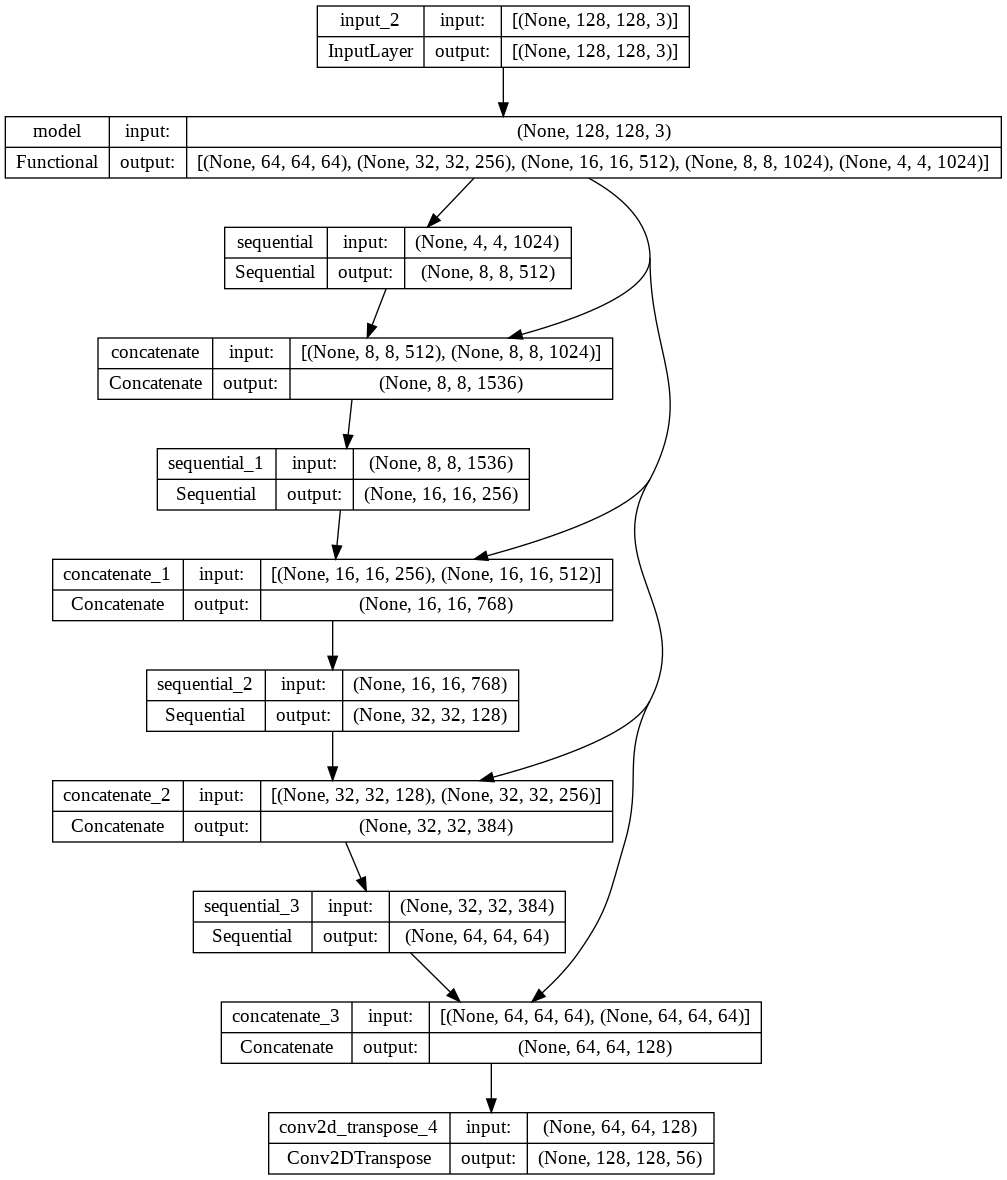

In [ ]:
# Visualizing the UNet model
keras.utils.plot_model(unet, show_shapes=True)

Now our model is perfectly ready so we can use it on our dataset.

# Preprocess the Data

In [ ]:
# Resizing the images
def resize_image(image):
     image = tf.cast(image, tf.float32)
     # scale values to [0,1]
     image = image/255.0
     # resize image
     image = tf.image.resize(image, (128,128))
     return image 

In [ ]:
# Resizing the annotations
def resize_annotations(annotations):
     annotations = tf.expand_dims(annotations, axis=-1)
     annotations = tf.image.resize(annotations, (128,128))
     annotations = tf.cast(annotations, tf.uint8)
     return annotations 

In [ ]:
# Splitting to train_test
X = [resize_image(i) for i in images]
y = [resize_annotations(m) for m in annotations]

ValueError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
train_X, val_X,train_y, val_y = train_test_split(X,y, test_size=0.2, random_state=0)

NameError: ignored

In [ ]:
train_X = tf.data.Dataset.from_tensor_slices(train_X)
val_X = tf.data.Dataset.from_tensor_slices(val_X)
train_y = tf.data.Dataset.from_tensor_slices(train_y)
val_y = tf.data.Dataset.from_tensor_slices(val_y)
train_X.element_spec, train_y.element_spec, val_X.element_spec, val_y.element_spec 

NameError: ignored

In [ ]:
train = tf.data.Dataset.zip((train_X, train_y))
val = tf.data.Dataset.zip((val_X, val_y))

NameError: ignored

# Preparing the data batches and shuffling the train data

In [ ]:
BATCH = 64
AT = tf.data.AUTOTUNE
BUFFER = 1000
STEPS_PER_EPOCH = 800//BATCH
VALIDATION_STEPS = 200//BATCH
train = train.cache().shuffle(BUFFER).batch(BATCH).repeat()
train = train.prefetch(buffer_size=AT)
val = val.batch(BATCH)

# Train the model

In [ ]:
example = next(iter(train))
preds = unet(example[0])
plt.imshow(example[0][60])
plt.colorbar()
plt.show() 

Checking the untrained results

In [ ]:
pred_annotations = tf.argmax(preds, axis=-1)
pred_annotations = tf.expand_dims(pred_annotations, -1)
plt.imshow(pred_annotations[0])
plt.colorbar()

# Compiling the model by optimizing the hyperparameter and training it for 50 epochs.

In [ ]:
unet.compile(loss= keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             optimizer=keras.optimizers.RMSprop(lr=0.001),
             metrics=['accuracy']) 

hist = unet.fit(train,
              validation_data=val,
              steps_per_epoch=STEPS_PER_EPOCH,
              validation_steps=VALIDATION_STEPS,
              epochs=50)

# Performance Evaluation

In [ ]:
# Let's see our model performance

img, mask = next(iter(val))
 pred = unet.predict(img)

 plt.figure(figsize=(10,5))
 for i in pred:
     plt.subplot(121)
     i = tf.argmax(i, axis=-1)
     plt.imshow(i,cmap='jet')
     plt.axis('off')
     plt.title('Prediction')
     break

 plt.subplot(122)
 plt.imshow(mask[0], cmap='jet')
 plt.axis('off')
 plt.title('Ground Truth')
 plt.show() 

In [ ]:
history = hist.history
acc=history['accuracy']
val_acc = history['val_accuracy']
plt.plot(acc, '-', label='Training Accuracy')
plt.plot(val_acc, '--', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Hence this is the obtained performance on set of our hyperparamter which we tuned for the doing transfer learning with UNet model.